___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [95]:
data= pd.read_csv("heart.csv")
df=data.copy()

# Ingest the data to notebook

In [96]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
233,64,1,0,120,246,0,0,96,1,2.200,0,1,2,0
88,54,0,2,110,214,0,1,158,0,1.600,1,0,2,1
166,67,1,0,120,229,0,0,129,1,2.600,1,2,3,0


# EDA

In [97]:
df.shape

(303, 14)

In [98]:
df.info()# null degerimiz yok 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- cinsiyet basta olmak uzere categorik verilerimi as type ile string e ceviyorum. Cunku  kategoruik verilerimizi cont veri cinsinden kurtariyoruz. Simdi eger ben bunu conttan kurtarmazsam 0.5 gibi bir deger verdiginde surekli olur. egitimimde problem olur ben bunu kesikli olacak seklilde stringe ceviiryorum. Bu islemi dumy icin yapiyirum.

In [99]:
df = df.astype({"sex": str, "cp": str,"fbs": str, "restecg":str, "exang":str,"slope":str, "thal":str, })

In [100]:
df = pd.get_dummies(df, drop_first= True )
# str cevirdigimi degerleri duymy yapiyorum


In [101]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.400,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.200,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [102]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,131.624,246.264,149.647,1.040,0.729,0.545,0.683,0.165,0.287,0.076,0.149,0.502,0.013,0.327,0.462,0.469,0.059,0.548,0.386
std,9.082,17.538,51.831,22.905,1.161,1.023,0.499,0.466,0.372,0.453,0.265,0.356,0.501,0.114,0.470,0.499,0.500,0.237,0.499,0.488
min,29.000,94.000,126.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,120.000,211.000,133.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,55.000,130.000,240.000,153.000,0.800,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,61.000,140.000,274.500,166.000,1.600,1.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000
max,77.000,200.000,564.000,202.000,6.200,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [103]:
for i in df.drop(columns ="target"):
    print(f"corr between Target and {i:<12}:  {df['target'].corr(df[i])}")
    #butun columlarin targeta gore cor aliyoruz

corr between Target and age         :  -0.22543871587483752
corr between Target and trestbps    :  -0.14493112849775172
corr between Target and chol        :  -0.08523910513756915
corr between Target and thalach     :  0.4217409338106747
corr between Target and oldpeak     :  -0.4306960016873689
corr between Target and ca          :  -0.3917239923512525
corr between Target and sex_1       :  -0.28093657550176687
corr between Target and cp_1        :  0.24587909539147876
corr between Target and cp_2        :  0.31674215819553964
corr between Target and cp_3        :  0.08695687464637597
corr between Target and fbs_1       :  -0.028045760272712914
corr between Target and restecg_1   :  0.17532180367281452
corr between Target and restecg_2   :  -0.068410239517832
corr between Target and exang_1     :  -0.43675708335330315
corr between Target and slope_1     :  -0.3620532995588202
corr between Target and slope_2     :  0.3940663689190677
corr between Target and thal_1      :  -0.1065889738

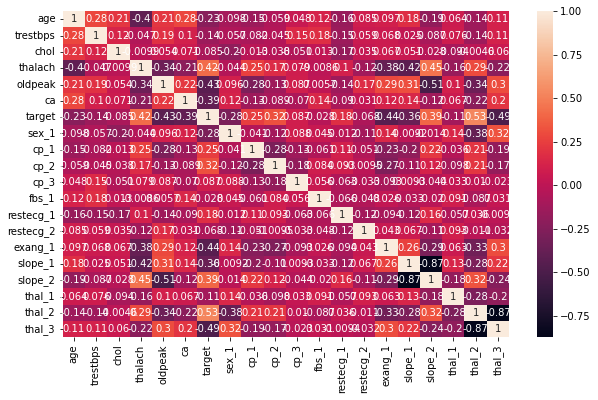

In [104]:
sns.heatmap(df.corr(), annot = True);

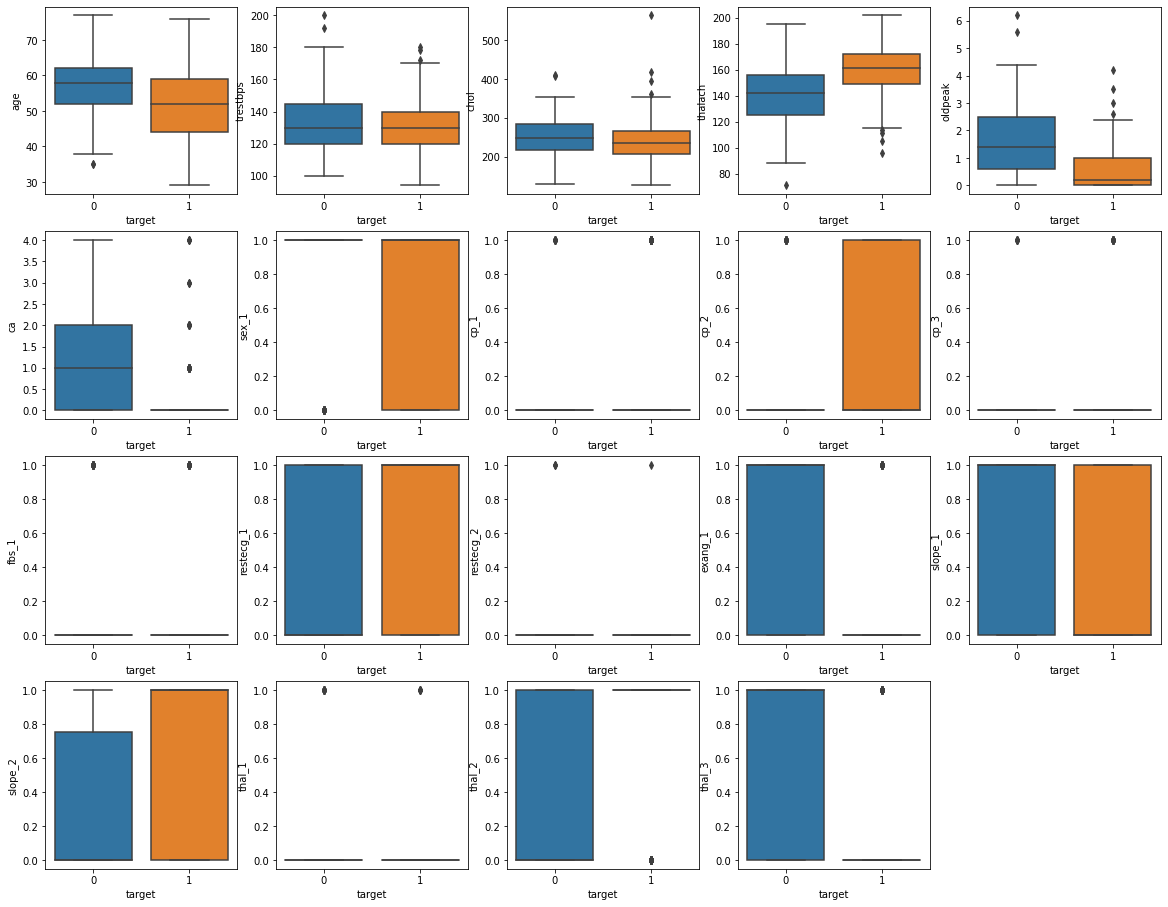

In [105]:
index = 0  # target valumuza gore featurelarin box plotunu aliyoruz
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(5,5,index)
        sns.boxplot(x='target',y=feature,data=df)


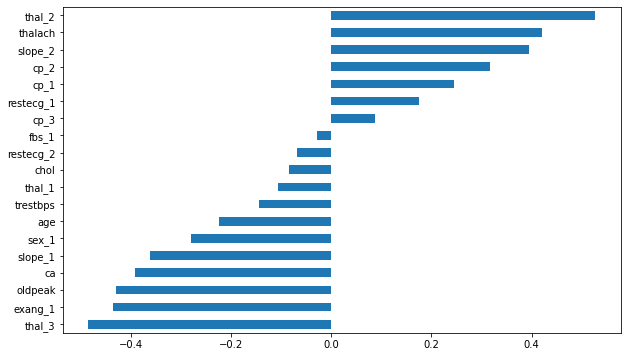

In [106]:
df.corr()["target"].drop("target").sort_values().plot.barh();
# target colum disndakileri cor larina baktik.
#mesela + anlamda enok thal_2 etkiliymis
#negetif anlamfa thal_3 etkiliymis

In [107]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.400,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.200,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [108]:
df_cont = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca', 'target']]
#cont lardan olusan bir df olurturduk 
# amaci describeda ,pair plot ...verlerde anlamli biseler ciksin diye
df_cont

,age,trestbps,chol,thalach,oldpeak,ca,target
0,63,145,233,150,2.300,0,1
1,37,130,250,187,3.500,0,1
2,41,130,204,172,1.400,0,1
3,56,120,236,178,0.800,0,1
4,57,120,354,163,0.600,0,1
...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0
299,45,110,264,132,1.200,0,0
300,68,144,193,141,3.400,2,0
301,57,130,131,115,1.200,1,0


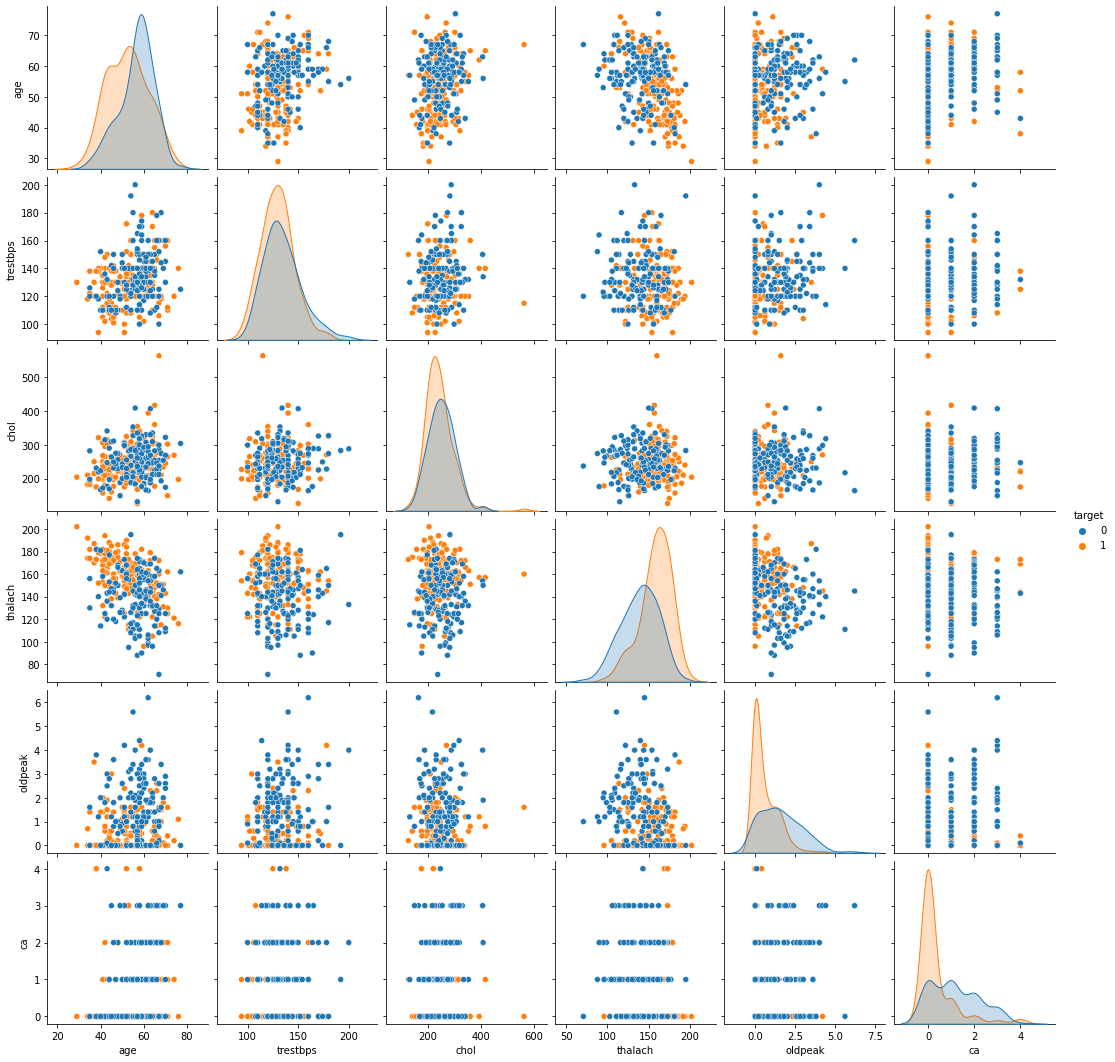

In [109]:
sns.pairplot(df_cont, hue = 'target');   


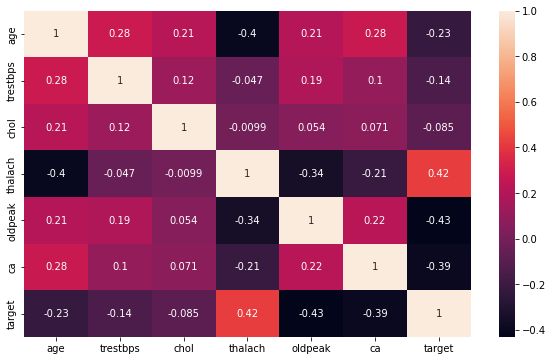

In [110]:
sns.heatmap(df_cont.corr(), annot = True);
#mesele  bak contlarin maplaeri daha anlami

In [111]:
df_get_dummy = df[['sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3', 'target']]
df_get_dummy
# dumy yaptigimiz string degerleri de gorelim onlar da eksik kalmasin :) 


,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target
0,1,0,0,1,1,0,0,0,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,0,1,0,1,0,1
3,1,1,0,0,0,1,0,0,0,1,0,1,0,1
4,0,0,0,0,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,1,0,1,1,0,0,0,1,0
299,1,0,0,1,0,1,0,0,1,0,0,0,1,0
300,1,0,0,0,1,1,0,0,1,0,0,0,1,0
301,1,0,0,0,0,1,0,1,1,0,0,0,1,0


# Data Preprocessing

In [112]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.400,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.200,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [113]:
X=df.drop(["target"], axis=1)# ulsmak istedigimiz sey zaten target datamizdan cikariyoruz ki zatne onu tesbit etmye caliyoruz
# supervised calismak icin bu sart :)
y=df["target"]# burda y target ve feature diye ikiye ayiriken...

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
#datayi  parcalara boluyoruz burda ise egitim  ve test icin ytrain,xtrain,ytest,xtest 


In [116]:
scaler = StandardScaler()#modeli anlamli bir sekilddee calistirmak ve yorumlamak icin ve kiyas yapabilmek icin verilerimi 
# ayni metrige cekiyorum,. satndarditasyon  normalizasyon ile yapiyorum


In [117]:
X_train

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
19,69,140,239,151,1.800,2,0,0,0,1,0,1,0,0,0,1,0,1,0
247,66,160,246,120,0.000,3,1,1,0,0,0,1,0,1,1,0,1,0,0
289,55,128,205,130,2.000,1,0,0,0,0,0,0,1,1,1,0,0,0,1
288,57,110,335,143,3.000,1,1,0,0,0,0,1,0,1,1,0,0,0,1
60,71,110,265,130,0.000,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,65,160,360,151,0.800,0,0,0,1,0,0,0,0,0,0,1,0,1,0
104,50,129,196,163,0.000,0,1,0,1,0,0,1,0,0,0,1,0,1,0
140,51,120,295,157,0.600,0,0,0,1,0,0,0,0,0,0,1,0,1,0
114,55,130,262,155,0.000,0,1,1,0,0,0,1,0,0,0,1,0,1,0


In [118]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train
#  egiytim datasini fit ve transform ediyoruz
# test datsini sadce donusturuyoruz yani transform ediyoruz 
# cunku test datasini ffit etmemizz data leakege dedigimiz verisizintiisina sebep olur
# asagidaki degerler (4 u neden uretti -1,06 neden uretti ???)


array([[ 1.61047991,  0.46184018, -0.12323542, ..., -0.24779731,
         0.93593215, -0.82495791],
       [ 1.28205058,  1.57559529,  0.02336627, ...,  4.03555625,
        -1.06845352, -0.82495791],
       [ 0.0778097 , -0.20641288, -0.83530077, ..., -0.24779731,
        -1.06845352,  1.21218305],
       ...,
       [-0.36009607, -0.65191492,  1.04957809, ..., -0.24779731,
         0.93593215, -0.82495791],
       [ 0.0778097 , -0.09503737,  0.35845584, ..., -0.24779731,
         0.93593215, -0.82495791],
       [ 1.0630977 ,  2.68935039,  1.67787105, ..., -0.24779731,
         0.93593215, -0.82495791]])

In [119]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[ 0.29676259,  1.01871774,  0.65165922, ...,  4.03555625,
        -1.06845352, -0.82495791],
       [ 1.39152703, -0.37347614,  0.19091106, ..., -0.24779731,
        -1.06845352,  1.21218305],
       [-0.90747829,  0.46184018,  1.38466767, ..., -0.24779731,
        -1.06845352,  1.21218305],
       ...,
       [-0.03166674, -1.20879247, -0.12323542, ..., -0.24779731,
        -1.06845352,  1.21218305],
       [ 0.40623903,  1.01871774,  0.52600063, ..., -0.24779731,
        -1.06845352,  1.21218305],
       [-0.57904896, -0.09503737,  0.44222824, ..., -0.24779731,
         0.93593215, -0.82495791]])

- Target valuemiz bizim loggistik regresyona uygun  yani ssiniflandirma fonk siyonu oldugu icin logistik regresyonn kullaniriz
- ama targetimiz var yok degil de continues deger uretilseydi lineer regresyon yapairdikkkkk

# Implement Logistic Regression and Evaluate

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
log_model=LogisticRegression()

In [122]:
log_model.fit(scaled_X_train, y_train) 
# burda modeli fit egitim   ediyoruz modele datayi ogretiyoruz 
#log modele gore scale ettigim datayi egit 


LogisticRegression()

In [123]:
df.shape

(303, 20)

In [124]:
log_model.coef_ #log modelin katsayilari  hangi feature targetima etkisi ne ....

array([[ 0.05112223, -0.15830979, -0.55019996,  0.33830234, -0.45297164,
        -0.53722558, -0.57453581,  0.42085699,  0.85652289,  0.50622193,
        -0.06374748,  0.26749763, -0.07263897, -0.41445368, -0.2149557 ,
         0.15885716,  0.02436584,  0.36190068, -0.47054727]])

In [125]:
log_model.intercept_ # bo yani kesisim noktammmm

array([0.19743871])

In [126]:
y_pred=log_model.predict(scaled_X_test)
y_pred 
# egitilen modelimizi test verimizi vererek modelimizin targeti tahmin etmesini istiyoruz 


array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [128]:
y_pred_proba = log_model.predict_proba(scaled_X_test)
y_pred_proba
# egitilen modelimizi test verimizi vererek modelimizin targeti tahmin etmesinin orani


array([[0.96179293, 0.03820707],
       [0.89192128, 0.10807872],
       [0.9931363 , 0.0068637 ],
       [0.1705224 , 0.8294776 ],
       [0.41717695, 0.58282305],
       [0.93539127, 0.06460873],
       [0.06566554, 0.93433446],
       [0.68125946, 0.31874054],
       [0.0122093 , 0.9877907 ],
       [0.55610944, 0.44389056],
       [0.89912833, 0.10087167],
       [0.39842961, 0.60157039],
       [0.94158555, 0.05841445],
       [0.02389499, 0.97610501],
       [0.01162699, 0.98837301],
       [0.13592212, 0.86407788],
       [0.0264357 , 0.9735643 ],
       [0.29603967, 0.70396033],
       [0.25360494, 0.74639506],
       [0.26230565, 0.73769435],
       [0.15298498, 0.84701502],
       [0.86195931, 0.13804069],
       [0.05796646, 0.94203354],
       [0.0797568 , 0.9202432 ],
       [0.0453204 , 0.9546796 ],
       [0.98059831, 0.01940169],
       [0.89075071, 0.10924929],
       [0.48004752, 0.51995248],
       [0.78553686, 0.21446314],
       [0.09476906, 0.90523094],
       [0.

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred 

test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)
# dataframeleri kiyas icin birlestirdik


,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target,pred,pred_proba
281,52,128,204,156,1.000,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0.281
26,59,150,212,157,1.600,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,0.945
197,67,125,254,163,0.200,2,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0.108
160,56,120,240,169,0.000,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0.934
194,60,140,185,155,3.000,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0.829
4,57,120,354,163,0.600,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0.642
272,67,120,237,71,1.000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.334
286,59,134,204,162,0.800,2,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0.944
102,63,140,195,179,0.000,2,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0.976
14,58,150,283,162,1.000,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0.962


# Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
#modelin performansini metriclerle olcuyoruz
#log modelinin en onemli performas mericleri confussion matrix ve classification yontemleridir..



In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")# mesela asagidaki cofussion metrigi ytrain ile ytraiprede bakicak
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    #kendi metricleri tanimlayip onlarin nerelere bakicagini soyluyoruz


In [ ]:
eval_metric(log_model, scaled_X_train, y_train,scaled_X_test, y_test)
# sonuclari aldik tahnim ile gercek deger arasindaki sonuclari belirledigimiz metrice gore aliyorz.


Test_Set
[[21  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61


Train_Set
[[ 89  21]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.85      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



-21=TN kisi hasta degil bizde hasta olmadigini bilmisiz
-7= FP ksi hasta degol ben hasta demisim 
- 3= FN  kisi hasta ben hasta degil demisim 
- 30 =TP ksi hasta bende hasta oldugunu bilmisim
accuracy= 0.86 makinemizin dogruluk orani 
precssion= makinamizin toplam TP/fp + Tp  sonuclarinin TP orani
recall= makinamizin tp / TP+ FN dogru bildiklerimizn icinde ki TP oorani
- support 0 larin toplami 1 lerin toplami yani bizim toplam olaymiz


CONFUSION MATRIX :

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[21,  7],
       [ 3, 30]])

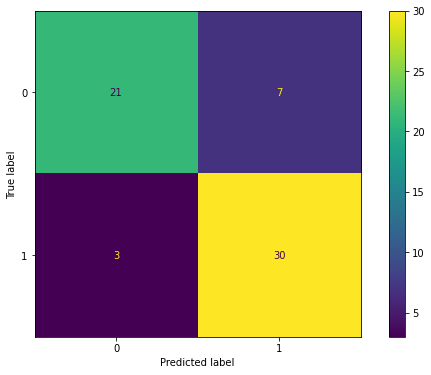

In [ ]:
plot_confusion_matrix(log_model,scaled_X_test, y_test);

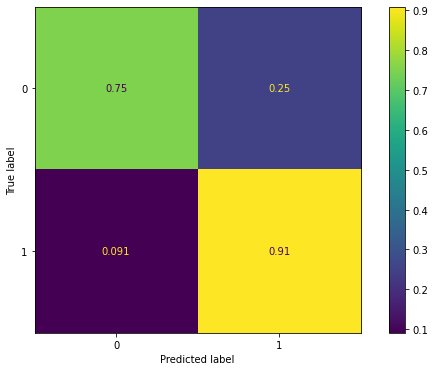

In [ ]:
plot_confusion_matrix(log_model,scaled_X_test, y_test, normalize='true');  
#normalize true bu gercek degere gore makinanin matrix
# 

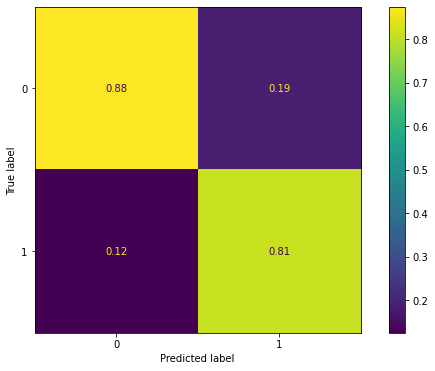

In [ ]:
plot_confusion_matrix(log_model,scaled_X_test, y_test, normalize='pred');
#bu da tahmin degerine gore orani

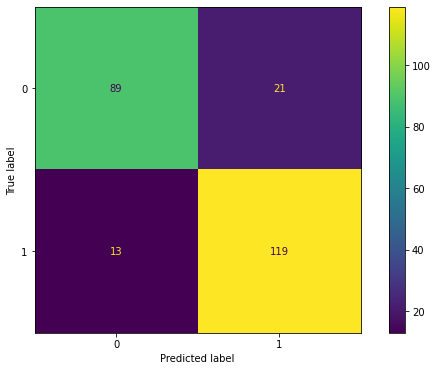

In [ ]:
plot_confusion_matrix(log_model,scaled_X_train, y_train);

# Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate
# log modelim icin cross vali yapiyorum butun modeli tariyrum. 


In [ ]:
model = LogisticRegression()# yeni modelde islem yaptiriyor

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))# 4 score gore modelimi olc bic
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.004,0.002,0.857,0.857,0.857,0.840
2,0.003,0.002,0.800,0.857,0.828,0.800
3,0.003,0.002,0.786,0.846,0.815,0.792
4,0.003,0.002,0.800,0.923,0.857,0.833
5,0.003,0.002,0.923,0.923,0.923,0.917
6,0.003,0.002,0.714,0.769,0.741,0.708
7,0.003,0.002,0.857,0.923,0.889,0.875
8,0.002,0.002,0.917,0.846,0.880,0.875
9,0.003,0.002,0.917,0.846,0.880,0.875
10,0.004,0.002,0.812,1.000,0.897,0.875


In [ ]:
df_scores.mean()[2:]


test_precision   0.838
test_recall      0.879
test_f1          0.857
test_accuracy    0.839
dtype: float64

In [ ]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[21  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61


Train_Set
[[ 89  21]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.85      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



- Grip search ile once modelin optimal hyper parametreleri bulup modeli optimal ediyorum

# GridSearch for Logistic Regression:

In [ ]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", 
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train_scaled,y_train)

/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emine/Library/Python/3.9/lib/pyth

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([     0.1       ,      0.20691381,      0.42813324,      0.88586679,
            1.83298071,      3.79269019,      7.8475997 ,     16.23776739,
           33.59818286,     69.51927962,    143.84498883,    297.63514416,
          615.84821107,   1274.2749857 ,   2636.65089873,   5455.59478117,
        11288.37891685,  23357.2146909 ,  48329.30238572, 100000.        ]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [ ]:
grid_model.best_params_


{'C': 0.42813323987193935,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  8]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61


Train_Set
[[ 90  20]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       110
           1       0.86      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



_ bizim modelimize uygiladigimi optimal hyper parametreleri modelimizin dogruluk payini gorsellestirmeye calisiyoruz

# ROC/AUC for Logistic Regression:

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

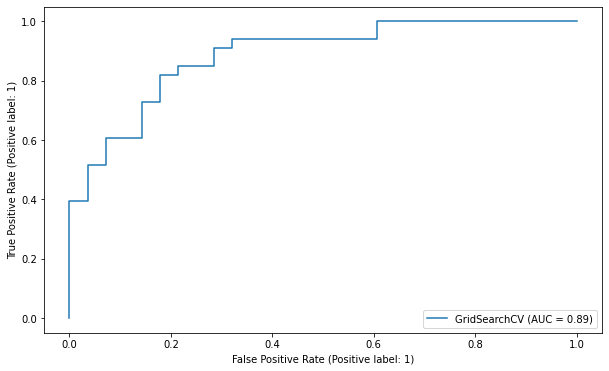

In [ ]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

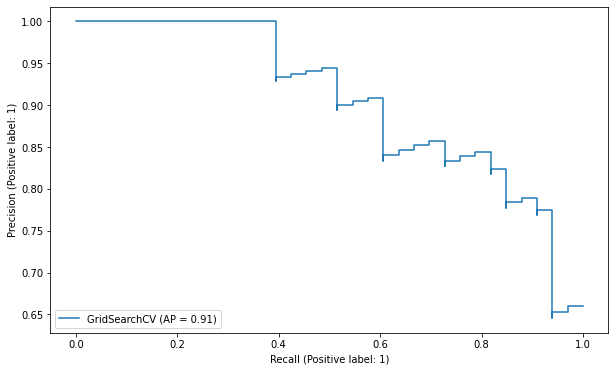

In [ ]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);


#trasehold belli oran altinda ki bizim modelimiz esigi belli esikden sonra sunu yapsin  belli esikden sonra 1 yapsin gibi

# Best Treshold for Logistic Regression:

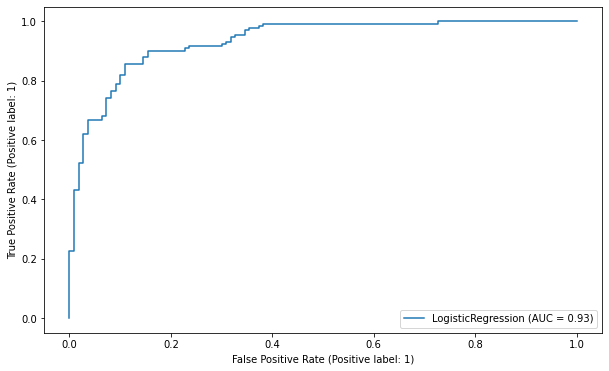

In [ ]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [ ]:
y_pred_proba = log_model.predict_proba(X_train_scaled) #
roc_auc_score(y_train, y_pred_proba[:,1])

0.934297520661157

- diger bir siniflandirma modeli , kucuk modellerde , en yakin komsuya bakarak karar veririz veriyi siniflandiriiz
- bunu yaparken 2 yontem en cok kullnilir , manhattan ve eucledion

# Implement KNN and Evaluate

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('target',axis=1) # yine targeti ayirdik supervised oldugu icin
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5) 


In [ ]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(scaled_X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0])

In [ ]:
y_pred_proba = knn_model.predict_proba(scaled_X_test)# benim kkn modelimin secim olasiklari

In [ ]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.600,0.400
1,0.400,0.600
2,0.200,0.800
3,1.000,0.000
4,0.000,1.000
...,...,...
86,1.000,0.000
87,0.400,0.600
88,0.400,0.600
89,0.800,0.200


In [ ]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
# dict olusturduk bizim gercek deger tahmin ettigi deger ve olasikliklari ayni anda goredcegi bir data frame olustirmak icn yaptik

In [ ]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
164,1,1,0.800,0.200
111,1,1,0.800,0.200
7,1,1,0.600,0.400
254,0,1,0.800,0.200
258,0,0,0.400,0.600
6,1,1,0.600,0.400
219,0,0,0.400,0.600
76,1,1,0.600,0.400
137,1,1,0.800,0.200
143,1,1,0.600,0.400


# yukarda LOg modeli iicn yaptigimiz islemleri KNN modeli icinde yaoiyoruz 

# Visually compare models based on your chosen metric

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix


In [ ]:
confusion_matrix(y_test, y_pred)

array([[33,  8],
       [12, 38]])

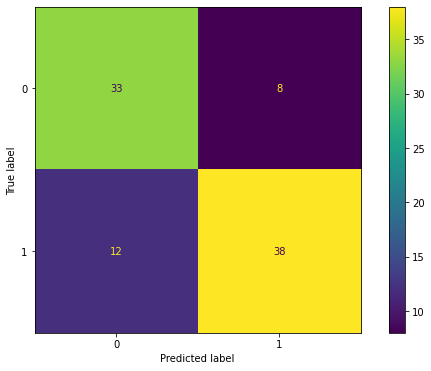

In [ ]:
plot_confusion_matrix(knn_model, scaled_X_test, y_test);

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  8]
 [12 38]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.83      0.76      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



- Bizim en yakin komsumuz ve sayisini  bulabilmek icn kullandigimiz bir yontem. en iyi kac bunu buluyoruz

# Elbow Method for Choosing Reasonable K Values

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


In [ ]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

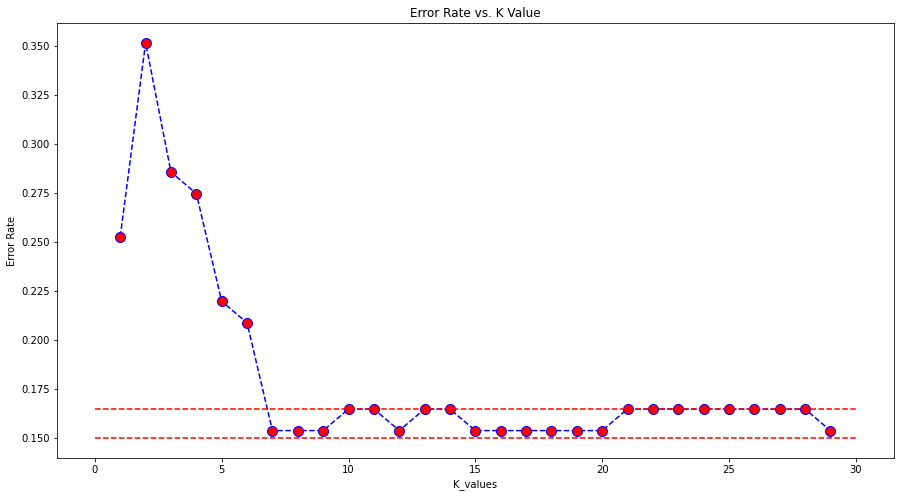

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.15, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.165, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

- bu grafige gore kacinn opyimal oldugunu yani in hata orani veren bakiyoruz biurda pek cogu ayni veriyor ama makinayi yormamak icin vben en kucuk olan & yi seciyorum

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=1


[[30 11]
 [12 38]]


              precision    recall  f1-score   support

           0       0.71      0.73      0.72        41
           1       0.78      0.76      0.77        50

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=20


[[36  5]
 [ 9 41]]


              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.89      0.82      0.85        50

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=7


[[35  6]
 [ 8 42]]


              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.88      0.84      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



- optiml

# Cross Validate for Optimal K Value:

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
model = KNeighborsClassifier(n_neighbors=7) # cross val. için yeni bir model object'i tanımladık

scores = cross_validate(model, scaled_X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001,0.004,0.818,0.833,0.833,0.833
2,0.001,0.003,0.864,1.000,0.750,0.857
3,0.001,0.003,0.810,0.833,0.833,0.833
4,0.000,0.002,0.810,0.833,0.833,0.833
5,0.000,0.002,0.714,0.688,0.917,0.786
6,0.000,0.003,0.810,0.818,0.818,0.818
7,0.000,0.002,0.810,0.769,0.909,0.833
8,0.000,0.003,0.952,0.917,1.000,0.957
9,0.000,0.002,0.762,0.875,0.636,0.737
10,0.000,0.003,0.762,0.800,0.727,0.762


In [ ]:
df_scores.mean()[2:]

test_accuracy    0.811
test_precision   0.837
test_recall      0.826
test_f1          0.825
dtype: float64

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
scoring = {'precision-0': make_scorer(precision_score,  pos_label=0),# bizim belrledgimiz metriclere gore modelimizin sonuclarina bakiyorum
           'recall-0': make_scorer(recall_score, pos_label =0),
           'f1-0': make_scorer(f1_score, pos_label = 0)}


In [ ]:
model = KNeighborsClassifier(n_neighbors=7) 

scores = cross_validate(model, scaled_X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision-0,test_recall-0,test_f1-0
1,0.001,0.004,0.800,0.800,0.800
2,0.000,0.003,0.769,1.000,0.870
3,0.000,0.002,0.778,0.778,0.778
4,0.000,0.002,0.778,0.778,0.778
5,0.000,0.002,0.800,0.444,0.571
6,0.000,0.002,0.800,0.800,0.800
7,0.000,0.002,0.875,0.700,0.778
8,0.000,0.002,1.000,0.900,0.947
9,0.000,0.002,0.692,0.900,0.783
10,0.000,0.002,0.727,0.800,0.762


In [ ]:
df_scores.mean()[2:]

test_precision-0   0.802
test_recall-0      0.790
test_f1-0          0.787
dtype: float64

# Gridsearch Method for Choosing Reasonable K Values

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = KNeighborsClassifier(n_neighbors=7)

scores = cross_validate(model, scaled_X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001,0.004,0.818,0.833,0.833,0.833
2,0.000,0.002,0.864,1.000,0.750,0.857
3,0.000,0.002,0.810,0.833,0.833,0.833
4,0.000,0.003,0.810,0.833,0.833,0.833
5,0.000,0.003,0.714,0.688,0.917,0.786
6,0.000,0.002,0.810,0.818,0.818,0.818
7,0.000,0.002,0.810,0.769,0.909,0.833
8,0.001,0.003,0.952,0.917,1.000,0.957
9,0.001,0.003,0.762,0.875,0.636,0.737
10,0.000,0.002,0.762,0.800,0.727,0.762


In [ ]:
df_scores.mean()[2:]

test_accuracy    0.811
test_precision   0.837
test_recall      0.826
test_f1          0.825
dtype: float64

In [ ]:
knn_grid = KNeighborsClassifier()

In [ ]:
k_values= range(1,30)

In [ ]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [ ]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [ ]:
knn_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
knn_grid_model.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}

In [ ]:
print('WITH K=20\n')
eval_metric(knn_grid_model,scaled_X_train, y_train,scaled_X_test, y_test)

WITH K=20

Test_Set
[[34  7]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91


Train_Set
[[79 18]
 [16 99]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        97
           1       0.85      0.86      0.85       115

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



# ROC/AUC :

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=20).fit(scaled_X_train, y_train)

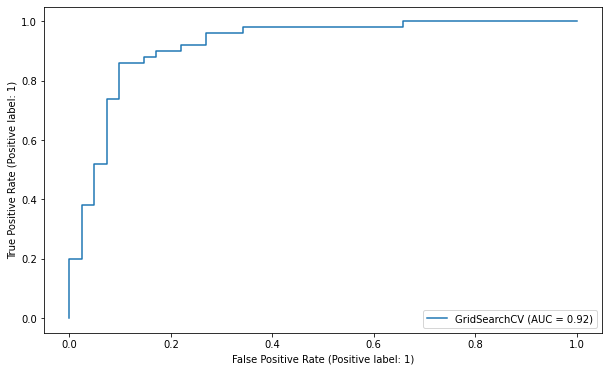

In [ ]:
plot_roc_curve(grid_model, scaled_X_test, y_test);  

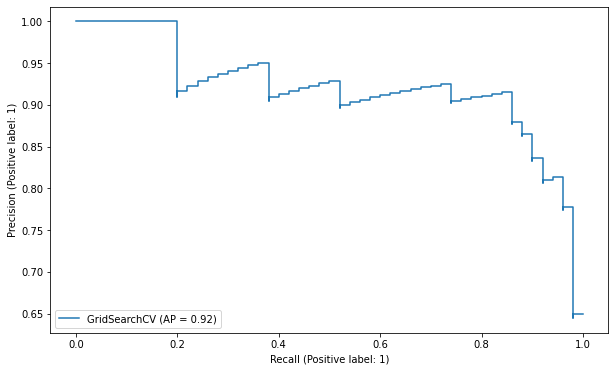

In [ ]:
plot_precision_recall_curve(grid_model, scaled_X_test, y_test);

In [ ]:
y_pred_proba = log_model.predict_proba(scaled_X_train)  
roc_auc_score(y_train, y_pred_proba[:,1])  

0.9257731958762887

In [ ]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [ ]:
fp_rate 

array([0.        , 0.        , 0.        , 0.01030928, 0.01030928,
       0.03092784, 0.03092784, 0.04123711, 0.04123711, 0.08247423,
       0.08247423, 0.09278351, 0.09278351, 0.10309278, 0.10309278,
       0.11340206, 0.11340206, 0.12371134, 0.12371134, 0.13402062,
       0.13402062, 0.1443299 , 0.1443299 , 0.16494845, 0.16494845,
       0.19587629, 0.19587629, 0.21649485, 0.21649485, 0.22680412,
       0.22680412, 0.26804124, 0.26804124, 0.27835052, 0.27835052,
       0.28865979, 0.28865979, 0.34020619, 0.34020619, 0.36082474,
       0.36082474, 0.42268041, 0.42268041, 0.45360825, 0.45360825,
       0.48453608, 0.48453608, 0.53608247, 0.53608247, 1.        ])

In [ ]:
tp_rate  

array([0.        , 0.00869565, 0.26086957, 0.26086957, 0.48695652,
       0.48695652, 0.63478261, 0.63478261, 0.66956522, 0.66956522,
       0.67826087, 0.67826087, 0.69565217, 0.69565217, 0.79130435,
       0.79130435, 0.80869565, 0.80869565, 0.82608696, 0.82608696,
       0.84347826, 0.84347826, 0.85217391, 0.85217391, 0.87826087,
       0.87826087, 0.88695652, 0.88695652, 0.89565217, 0.89565217,
       0.90434783, 0.90434783, 0.91304348, 0.91304348, 0.92173913,
       0.92173913, 0.93043478, 0.93043478, 0.93913043, 0.93913043,
       0.96521739, 0.96521739, 0.97391304, 0.97391304, 0.9826087 ,
       0.9826087 , 0.99130435, 0.99130435, 1.        , 1.        ])

In [ ]:
optimal_idx = np.argmax(tp_rate - fp_rate)          
optimal_threshold = thresholds[optimal_idx]         
optimal_threshold

0.5367459000155533

# Chose best model and make a random prediction 

In [ ]:
import pickle

In [ ]:
scaler = StandardScaler() #  daha onceki bilgiler karismasin diye yeniden scale ediyorum 

In [ ]:
scaler.fit(X)# escale ettigimi komplee egitioyorum bak burda ayirma yoook

StandardScaler()

In [ ]:
pickle.dump(scaler, open('scaler_knn_heart.pkl', 'wb'))# burda bir dosya olusturyor
# dosya veriyi nasil sclae edecek onu biliyro
# modeli scale ettik ya ona gore ozgun bir dosya olusturup kaytdediyoruz
# 

In [ ]:
X_scaled = scaler.transform(X) # biz modele nasil scale edecegini ogrettik yukarda 
# burdda daverileri scale ediyoruz

In [ ]:
final_knn_model = KNeighborsClassifier(n_neighbors=7)# ben 7 oldugunu zaten tesbit ettim 
#atama yapiyorum final model icin en yakin komsu 7 diyom ugramiyor

In [ ]:
pickle.dump(final_knn_model, open('knn_final_heart.pkl', 'wb')) # burda dump ile dosya olusturuyor
# wb write ediyor

In [ ]:
loaded_scaler = pickle.load(open('scaler_knn_heart.pkl', 'rb'))
# pickle ile olusturdugum modeli bir dosyaya atiyorum
# yukardaki dumplari yukluyorum
# tususnunu kurdugum dosyalari kullanmaya basliyorum
# rb okuyor reead

- looded scaler yeni bir dosya gibi bunu yukluyor.
-bri verinin 

In [ ]:
loaded_model = pickle.load(open('knn_final_heart.pkl', 'rb'))
# olusturduklairmi yukluyorum

In [ ]:
X.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [ ]:
X.describe()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,131.624,246.264,149.647,1.040,0.729,0.683,0.165,0.287,0.076,0.149,0.502,0.013,0.327,0.462,0.469,0.059,0.548,0.386
std,9.082,17.538,51.831,22.905,1.161,1.023,0.466,0.372,0.453,0.265,0.356,0.501,0.114,0.470,0.499,0.500,0.237,0.499,0.488
min,29.000,94.000,126.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,120.000,211.000,133.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,55.000,130.000,240.000,153.000,0.800,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,61.000,140.000,274.500,166.000,1.600,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000
max,77.000,200.000,564.000,202.000,6.200,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
X.sample(10)

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
47,47,138,257,156,0.000,0,1,0,1,0,0,0,0,0,0,1,0,1,0
300,68,144,193,141,3.400,2,1,0,0,0,1,1,0,0,1,0,0,0,1
235,51,140,299,173,1.600,0,1,0,0,0,0,1,0,1,0,1,0,0,1
44,39,140,321,182,0.000,0,1,0,1,0,0,0,0,0,0,1,0,1,0
163,38,138,175,173,0.000,4,1,0,1,0,0,1,0,0,0,1,0,1,0
194,60,140,185,155,3.000,0,1,0,1,0,0,0,0,0,1,0,0,1,0
51,66,120,302,151,0.400,0,1,0,0,0,0,0,0,0,1,0,0,1,0
157,35,122,192,174,0.000,0,1,1,0,0,0,1,0,0,0,1,0,1,0
182,61,130,330,169,0.000,0,0,0,0,0,0,0,0,0,0,1,0,1,0
244,56,132,184,105,2.100,1,1,0,0,0,0,0,0,1,1,0,1,0,0


In [ ]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2',
       'exang_1', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

# Make a random prediction 

- modelimi disardan gelen veri ile test ediyorum

In [ ]:
new_obs = {'age': [15, 20 ,38, 42, 56, 75, 82, 12, 34, 59],
           'trestbps': [120, 131, 136, 140, 120, 150, 175, 172, 192, 100],
           'chol': [130, 148, 154, 196, 306, 448, 211, 346, 460, 500],
           'thalach': [80, 200, 158, 95, 78, 186, 195, 148, 200, 98],
           'oldpeak': [3.3, 4.5, 0.7, 2.4, 3.7, 4.2, 5.7, 0.7, 6.1, 1.0],
           'ca' : [2.0, 1.0, 4.0, 0.0, 4.0, 3.0, 2.0, 3.0, 1.0, 0.0],
           'sex_1': [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
           'cp_1': [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
           'cp_2': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'cp_3': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
           'fbs_1': [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'restecg_1': [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
           'restecg_2': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'exang_1': [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0],
           'slope_1': [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0],
           'slope_2': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
           'thal_1': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
           'thal_2': [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
           'thal_3': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]}

In [ ]:
samples = pd.DataFrame(new_obs)
samples

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,15,120,130,80,3.300,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000


In [ ]:
samples_scaled = loaded_scaler.transform(samples)# yukarda looded diye adlandirmistim 
# benim isteklerime gore disarddan gelen veriye gore scale diyor
samples_scaled

array([[-4.34166707, -0.66386682, -2.24685838, -3.04569256,  1.95003362,
         1.24459328, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
        -0.41763453,  0.9967051 , -0.11566299, -0.69663055,  1.07902072,
        -0.93914194, -0.25131234,  0.9084609 , -0.79311554],
       [-3.79022294, -0.03562488, -1.8989997 ,  2.20196803,  2.98526828,
         0.26508221, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
         2.394438  , -1.00330579,  8.64580823,  1.43548113,  1.07902072,
        -0.93914194, -0.25131234, -1.10076284,  1.26085034],
       [-1.80502406,  0.24993964, -1.78304681,  0.36528682, -0.29297483,
         3.20361543,  0.68100522, -0.44455422,  1.57567719, -0.28660575,
         2.394438  ,  0.9967051 , -0.11566299,  1.43548113,  1.07902072,
        -0.93914194, -0.25131234,  0.9084609 , -0.79311554],
       [-1.36386876,  0.47839125, -0.97137655, -2.38973499,  1.17360762,
        -0.71442887, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
         2.394

In [ ]:
loaded_model.fit(X_scaled, y)

KNeighborsClassifier()

In [ ]:
predictions = loaded_model.predict(samples_scaled)# tahmin ettiriyor
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [ ]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,pred,pred_proba_1,pred_proba_0
0,15,120,130,80,3.300,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1,0.800,0.200
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0,0.200,0.800
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1,0.800,0.200
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1,0.800,0.200
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0,0.200,0.800
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.200,0.800
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.200,0.800
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0,0.200,0.800
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0,0.200,0.800
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0,0.400,0.600
